<a href="https://colab.research.google.com/github/Avadhesh-Kumar45/Digital-Image-Processing---Lab/blob/main/AP22110011079_Exp_9_Avadhesh_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Develop programs to implement frequency domain smoothing filters (Ideal, Butterworth and Gaussian) and apply these filters on a grayscale image.**

**a. Compare/comment on the output of Ideal, Butterworth and Gaussian Low pass Filters having the same radii (cutoff frequency) value.**

**b. Consider a suitable gray scale image and demonstrate the ringing effect on the output of the Ideal low pass frequency domain filter.**

**c. Compare the output of Butterworth low pass filters (order n=2) for different cutoff frequencies (5, 15, 30, 90, 120).**

**d. Compare the output of Gaussian low pass filters for different cutoff frequencies (5, 15, 30, 90, and 120).**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Read and Preprocess the Grayscale Image**

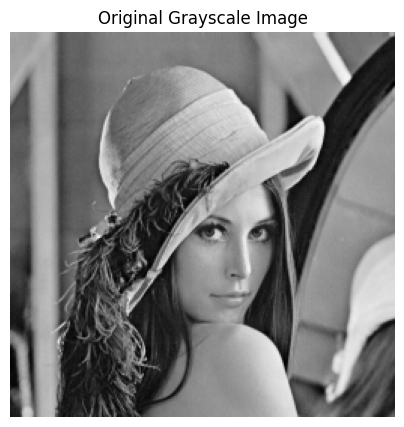

In [2]:
image = cv2.imread('/content/Lenna.png', 0)  # Load image in grayscale
image = cv2.resize(image, (256, 256))        # Resize for uniformity

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()


**Function Definitions for Filters**

In [3]:
# Perform DFT
def dft_image(img):
    return np.fft.fftshift(np.fft.fft2(img))

# Perform inverse DFT
def idft_image(dft):
    return np.abs(np.fft.ifft2(np.fft.ifftshift(dft)))

# Ideal Low Pass Filter
def ideal_low_pass(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow)**2 + (j - ccol)**2) <= cutoff:
                mask[i, j] = 1
    return mask

# Butterworth Low Pass Filter
def butterworth_low_pass(shape, cutoff, n):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - crow)**2 + (j - ccol)**2)
            mask[i, j] = 1 / (1 + (d / cutoff)**(2 * n))
    return mask

# Gaussian Low Pass Filter
def gaussian_low_pass(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            d2 = (i - crow)**2 + (j - ccol)**2
            mask[i, j] = np.exp(-d2 / (2 * (cutoff**2)))
    return mask


**Apply Filter to Image**

In [4]:
def apply_filter(image, mask):
    dft = dft_image(image)
    filtered_dft = dft * mask
    return idft_image(filtered_dft)


**Apply and Compare Filters (Cutoff = 30)**

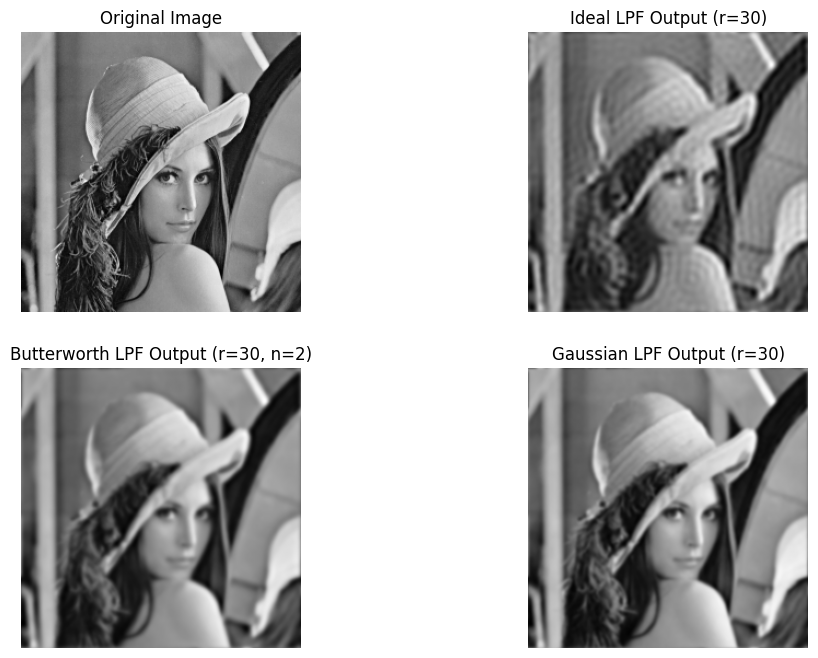

In [5]:
cutoff = 30
ideal_mask = ideal_low_pass(image.shape, cutoff)
butter_mask = butterworth_low_pass(image.shape, cutoff, n=2)
gauss_mask = gaussian_low_pass(image.shape, cutoff)

ideal_output = apply_filter(image, ideal_mask)
butter_output = apply_filter(image, butter_mask)
gauss_output = apply_filter(image, gauss_mask)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(ideal_output, cmap='gray')
plt.title("Ideal LPF Output (r=30)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(butter_output, cmap='gray')
plt.title("Butterworth LPF Output (r=30, n=2)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(gauss_output, cmap='gray')
plt.title("Gaussian LPF Output (r=30)")
plt.axis('off')

plt.show()


**Demonstrate Ringing Effect - Ideal Filter (b)**

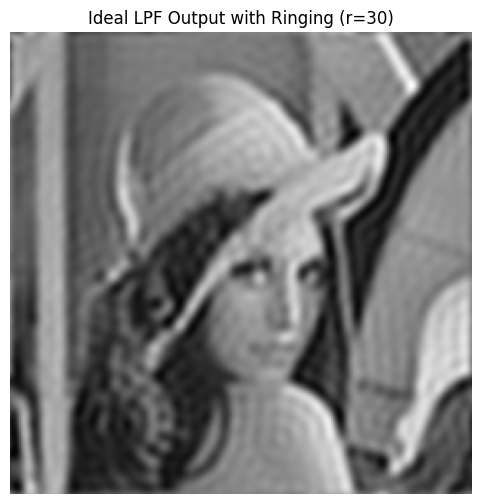

In [6]:
plt.figure(figsize=(6, 6))
plt.imshow(ideal_output, cmap='gray')
plt.title("Ideal LPF Output with Ringing (r=30)")
plt.axis('off')
plt.show()


**Compare Butterworth LPF for Different Cutoff Values (c)**

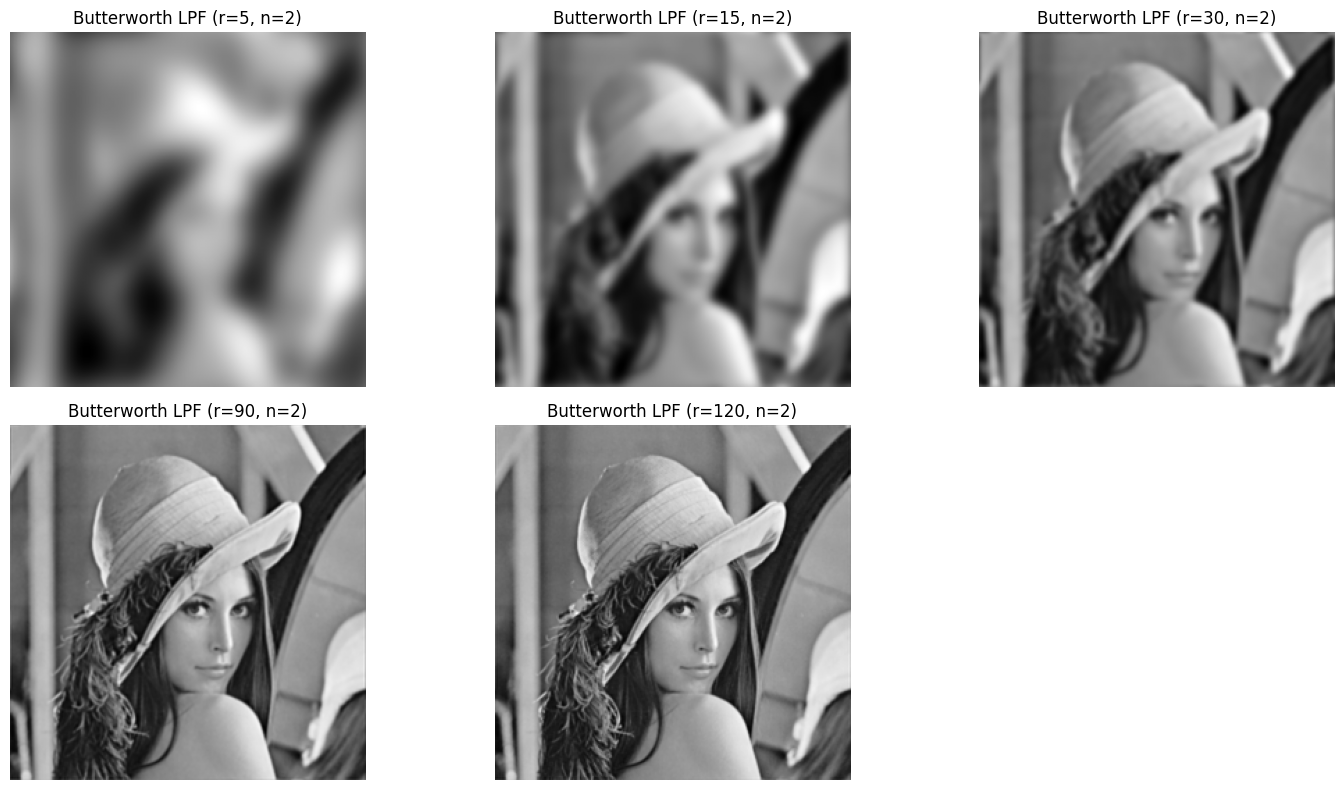

In [7]:
cutoffs = [5, 15, 30, 90, 120]
plt.figure(figsize=(15, 8))

for i, c in enumerate(cutoffs):
    butter = butterworth_low_pass(image.shape, c, n=2)
    result = apply_filter(image, butter)
    plt.subplot(2, 3, i+1)
    plt.imshow(result, cmap='gray')
    plt.title(f'Butterworth LPF (r={c}, n=2)')
    plt.axis('off')

plt.tight_layout()
plt.show()


**Compare Gaussian LPF for Different Cutoff Values (d)**

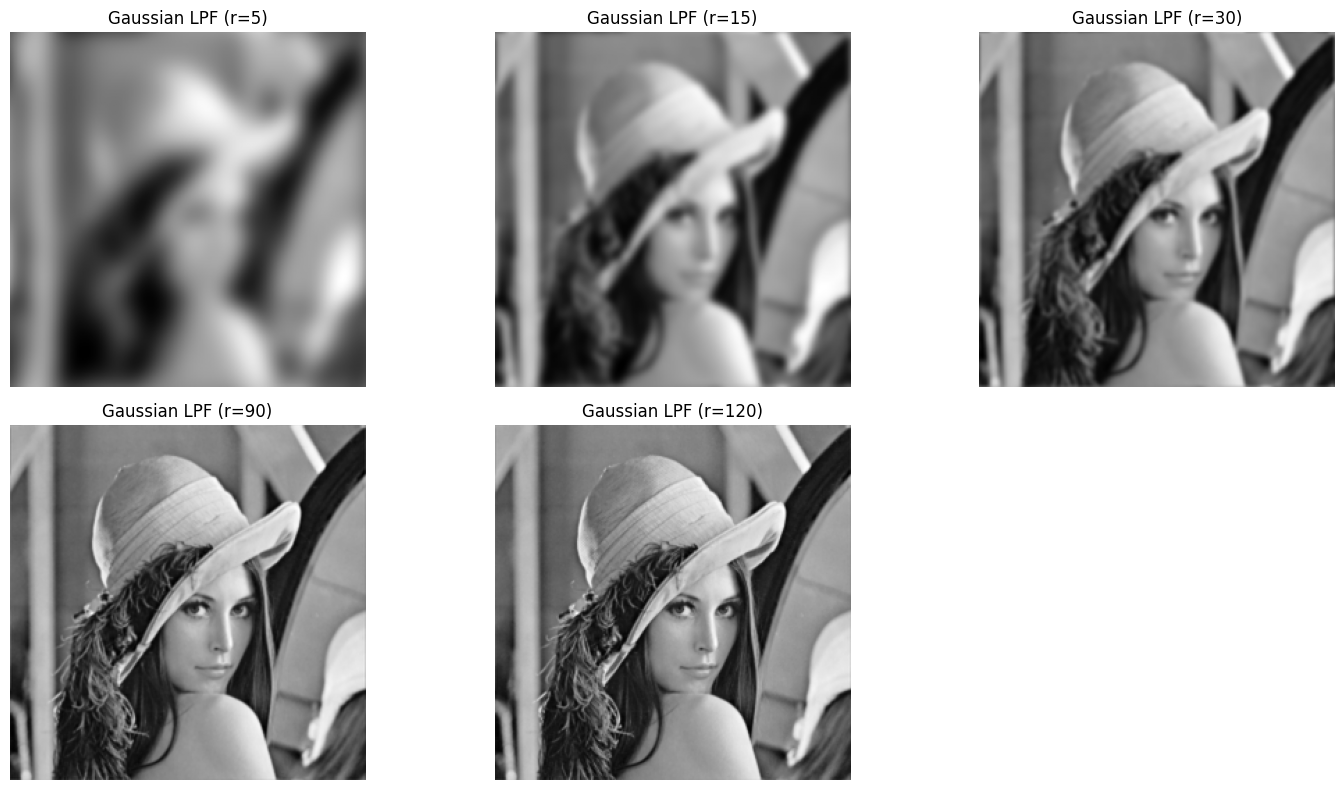

In [8]:
plt.figure(figsize=(15, 8))

for i, c in enumerate(cutoffs):
    gauss = gaussian_low_pass(image.shape, c)
    result = apply_filter(image, gauss)
    plt.subplot(2, 3, i+1)
    plt.imshow(result, cmap='gray')
    plt.title(f'Gaussian LPF (r={c})')
    plt.axis('off')

plt.tight_layout()
plt.show()
